# Independent Component Analysis (ICA) Demonstration

This Python script showcases the application of Independent Component Analysis (ICA) using sklearn.decomposition.FastICA to separate mixed signals into their original independent sources.

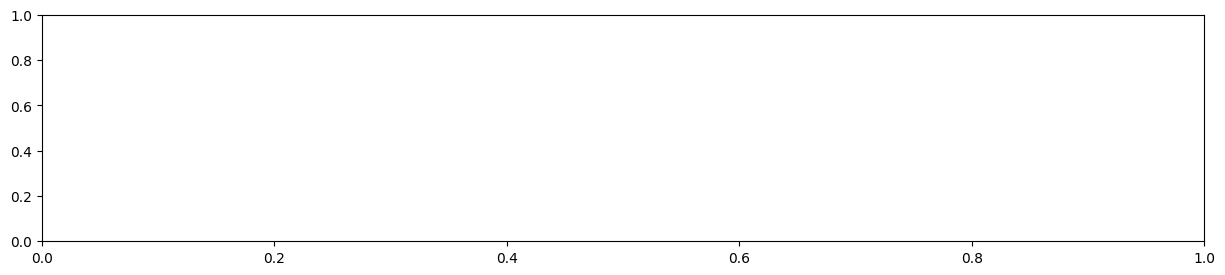

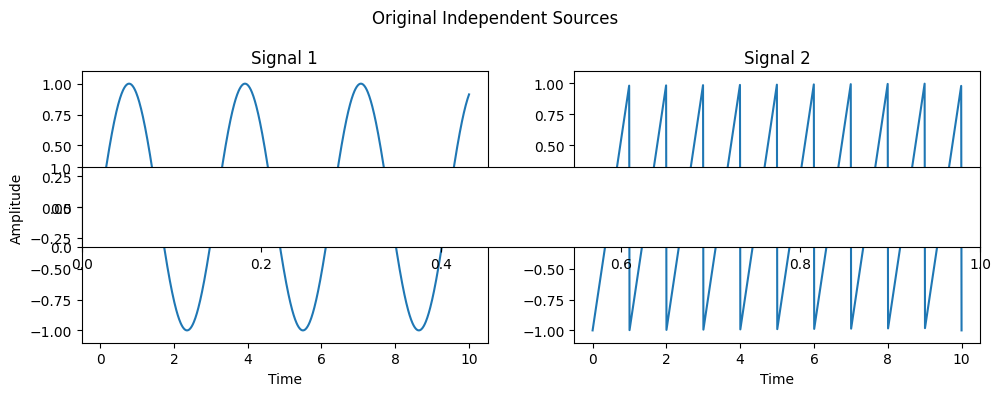

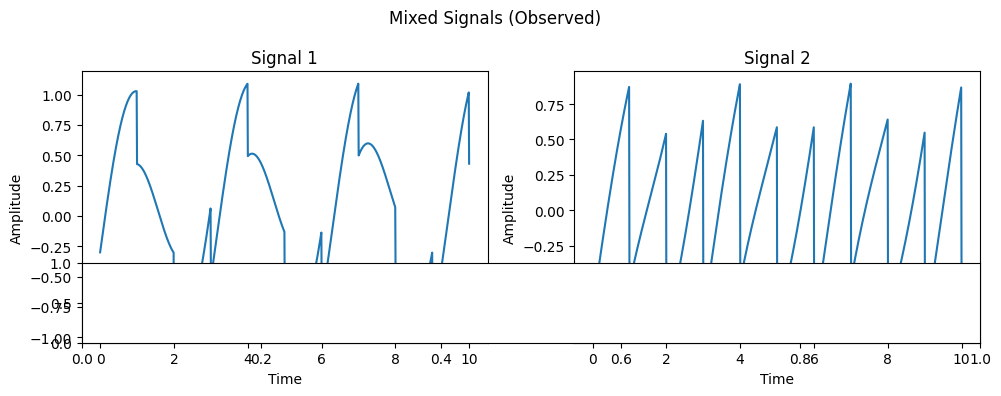

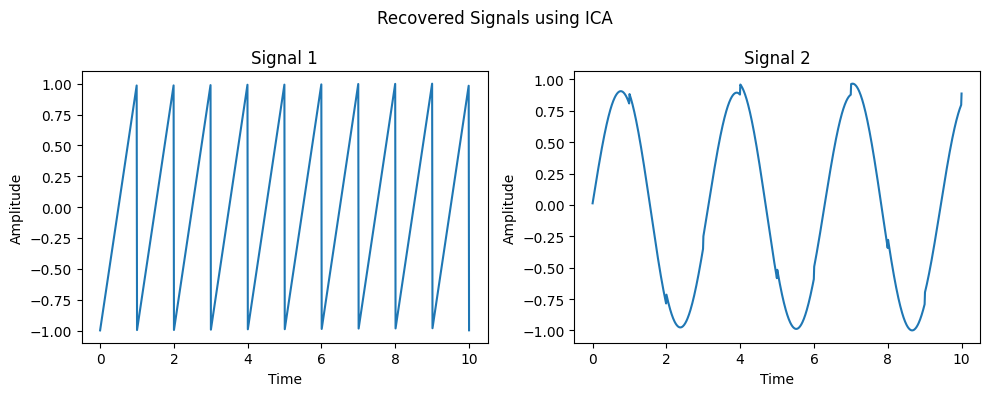

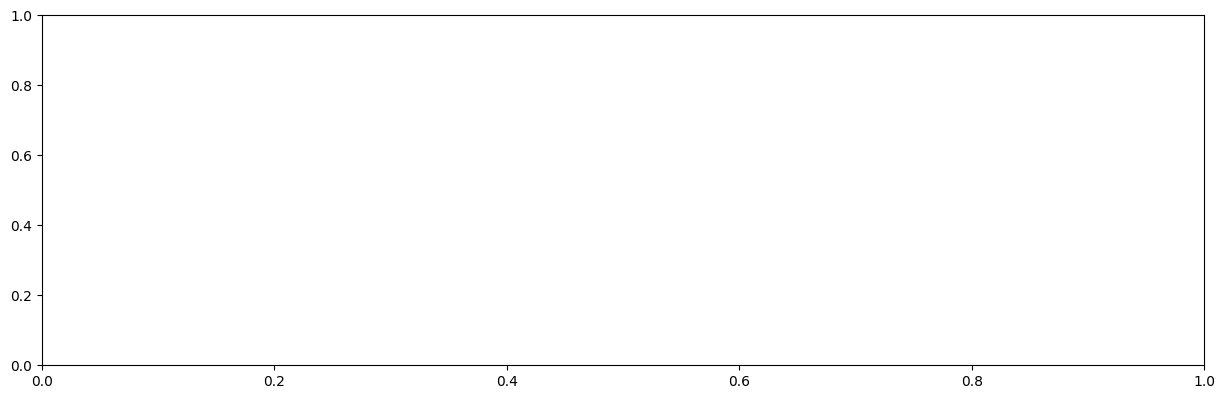

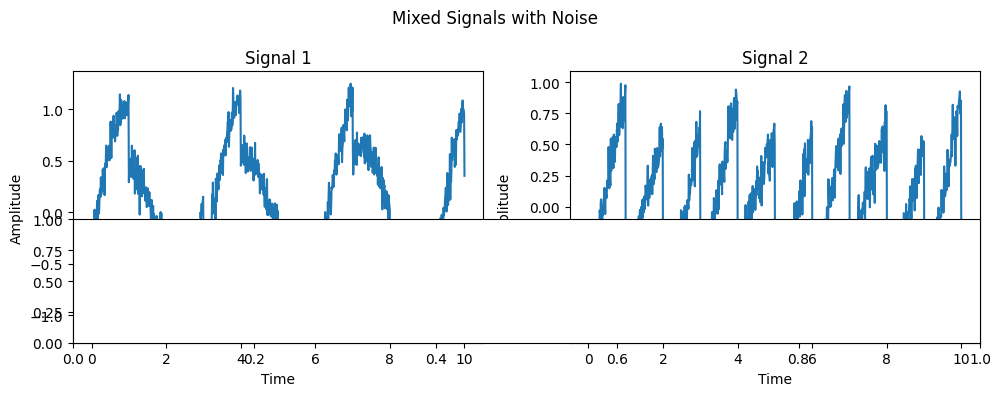

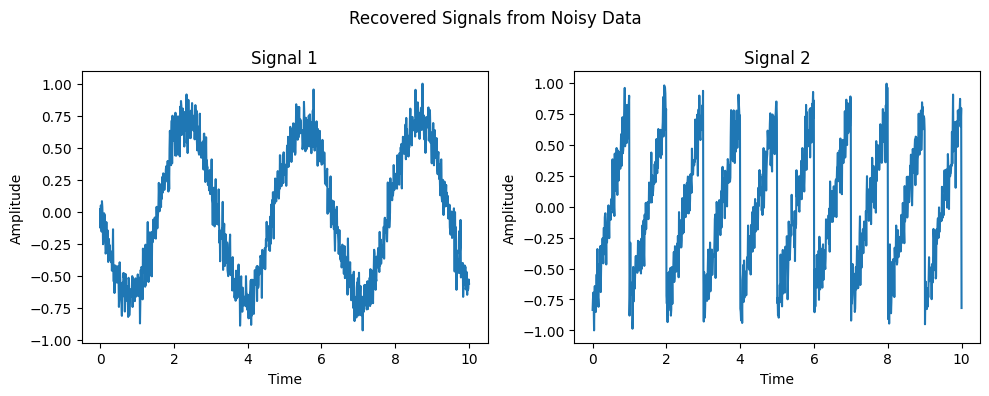

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy import signal

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data: Two independent sources
time = np.linspace(0, 10, 1000)
s1 = np.sin(2 * time)  # Sinusoidal signal
s2 = signal.sawtooth(2 * np.pi * time)  # Sawtooth signal

# Combine them into the source signals matrix
S = np.c_[s1, s2]

# Create a mixing matrix and mix the sources
A = np.array([[0.8, 0.3],
              [0.2, 0.7]])
X = np.dot(S, A.T)  # Mixed signals

# Apply ICA
ica = FastICA(n_components=2)
S_recovered = ica.fit_transform(X)
# Normalize recovered signals
S_recovered = S_recovered / np.max(np.abs(S_recovered), axis=0)

# Plotting function
def plot_signals(time, signals, title):
    plt.figure(figsize=(10, 4))
    for i, sig in enumerate(signals.T):
        plt.subplot(1, 2, i + 1)
        plt.plot(time, sig)
        plt.title(f'Signal {i+1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
    plt.suptitle(title)
    plt.tight_layout()

# Create visualizations
plt.figure(figsize=(15, 10))

# Original sources
plt.subplot(3, 1, 1)
plot_signals(time, S, 'Original Independent Sources')

# Mixed signals
plt.subplot(3, 1, 2)
plot_signals(time, X, 'Mixed Signals (Observed)')

# Recovered signals
plt.subplot(3, 1, 3)
plot_signals(time, S_recovered, 'Recovered Signals using ICA')

plt.show()

# Demonstration of ICA with noise
# Add random noise to the mixed signals
X_noisy = X + np.random.normal(0, 0.1, X.shape)

# Apply ICA to noisy signals
S_recovered_noisy = FastICA(n_components=2).fit_transform(X_noisy)
# Normalize noisy recovered signals
S_recovered_noisy = S_recovered_noisy / np.max(np.abs(S_recovered_noisy), axis=0)

# Plot results with noise
plt.figure(figsize=(15, 10))

# Mixed signals with noise
plt.subplot(2, 1, 1)
plot_signals(time, X_noisy, 'Mixed Signals with Noise')

# Recovered signals from noisy data
plt.subplot(2, 1, 2)
plot_signals(time, S_recovered_noisy, 'Recovered Signals from Noisy Data')

plt.show()